# Desafio de Classificação: Detectando Fraudes em Transações Bancárias

### História do Desafio

O Banco SeguraMais, uma instituição financeira renomada e comprometida com a segurança de seus clientes, enfrenta um desafio crescente: o aumento de fraudes em transações bancárias. Com o avanço da tecnologia e a sofisticação dos métodos fraudulentos, identificar transações legítimas e fraudulentas tornou-se uma tarefa cada vez mais complexa. Para proteger seus clientes e garantir a integridade de suas operações, o banco decidiu investir em uma solução de inteligência artificial capaz de classificar transações em tempo real com alta precisão.

O objetivo do Banco SeguraMais é criar um modelo de classificação que seja capaz de identificar fraudes com alta precisão, sem comprometer a experiência do cliente. Isso significa que o modelo deve ser eficiente tanto em detectar fraudes (minimizando falsos negativos) quanto em evitar falsos alarmes (minimizando falsos positivos), garantindo que transações legítimas não sejam erroneamente bloqueadas.

---

### Descrição do Dataset

O dataset fornecido contém informações sobre transações bancárias realizadas pelos clientes do Banco SeguraMais. Cada linha do dataset representa uma transação, e as colunas contêm informações relevantes sobre a transação e seu status (fraude ou não fraude). Abaixo está a descrição das variáveis presentes no dataset:

- Cliente: Identificador único do cliente que realizou a transação.
- Tipo de Transação: O tipo de transação realizada (ex.: Saque, PIX, Débito, Crédito).
- Valor da Transação: O valor monetário da transação.
- Valor Anterior à Transação: O saldo do cliente antes da transação.
- Valor Após a Transação: O saldo do cliente após a transação.
- Horário da Transação: O horário em que a transação foi realizada.
- Classe: A variável alvo, indicando se a transação foi fraudulenta (1) ou legítima (0).

---

### Objetivo do Desafio

O objetivo do desafio é construir um modelo de classificação utilizando árvore de decisão que seja capaz de prever com alta precisão se uma transação é fraudulenta ou não. O modelo deve ser avaliado com base em métricas que considerem tanto a capacidade de detectar fraudes (sensibilidade) quanto a capacidade de evitar falsos alarmes (especificidade). O Banco SeguraMais busca um equilíbrio entre essas métricas para garantir a segurança de seus clientes sem comprometer a experiência de uso. Faça um texto de análise dos resultados obtidos ao final do arquivo com suas interpretações sobre o resultado obtido

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
# Carregar o conjunto de dados
df = pd.read_csv('./datasets/transacoes_fraude.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cliente                     13000 non-null  object 
 1   Tipo de Transacao           13000 non-null  object 
 2   Valor da Transacao          13000 non-null  float64
 3   Valor Anterior a Transacao  13000 non-null  float64
 4   Valor Apos a Transacao      13000 non-null  float64
 5   Horario da Transacao        13000 non-null  object 
 6   Classe                      13000 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 711.1+ KB


In [4]:
df.describe()

,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Classe
count,13000.000000,13000.000000,13000.000000,13000.000000
mean,2511.899952,7547.003386,5035.103435,0.110000
std,1436.446865,3225.212074,2884.967560,0.312902
min,10.000000,95.440000,10.120000,0.000000
25%,1279.412500,5038.805000,2533.727500,0.000000
50%,2525.610000,7538.255000,4997.090000,0.000000
75%,3754.945000,10046.875000,7551.552500,0.000000
max,4999.960000,14897.740000,9999.390000,1.000000


In [8]:
df.head(10)

,Tipo de Transacao,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Horario da Transacao,Classe
0,Saque,390.39,5446.75,5056.36,2023-03-14T07:29:28.256579,0
1,Saque,3272.03,12167.89,8895.86,2023-02-12T17:54:09.119410,0
2,PIX,4905.72,8217.63,3311.91,2023-10-03T17:31:42.087599,0
3,PIX,3073.23,7833.16,4759.93,2024-05-23T17:57:02.055680,0
4,PIX,4233.03,6920.82,2687.79,2022-10-07T17:30:36.879557,0
5,Débito,4848.49,7354.41,2505.92,2025-07-08T19:16:37.207970,0
6,Crédito,1600.44,7296.87,5696.43,2024-09-07T02:23:16.975044,0
7,Crédito,1296.71,10562.92,9266.21,2023-08-28T23:09:19.817457,0
8,Débito,1187.35,10935.18,9747.83,2024-05-21T09:01:08.163132,0
9,PIX,3271.51,3405.61,134.10,2022-09-26T10:33:12.415982,0


In [7]:
# Considerando que cliente não é um coluna que deve influenciar no modelo, vamos removê-la
df.drop(columns=['Cliente'], inplace=True)

### Análise da Variavel Tipo de Transação

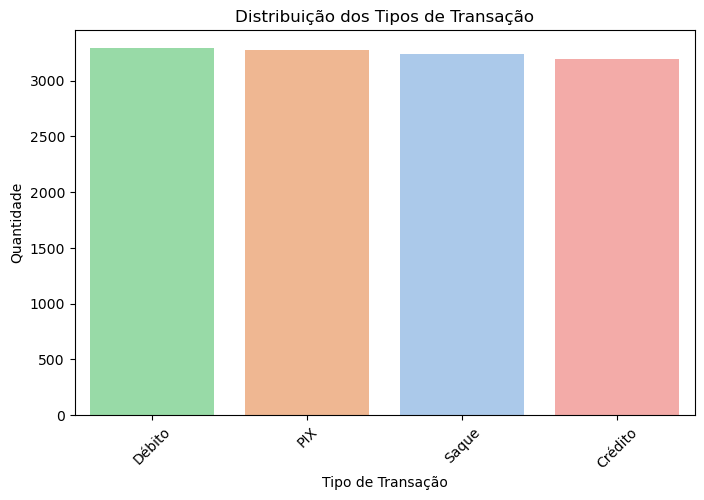

In [ ]:
# Vamos analisar a varivel Tipo de Transacao para verificar se existe desbalanceamento

plt.figure(figsize=(8,5))
sns.countplot(x='Tipo de Transacao', hue='Tipo de Transacao', data=df, palette='pastel', order=df['Tipo de Transacao'].value_counts().index, legend=False)
plt.title('Distribuição dos Tipos de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x700 with 0 Axes>

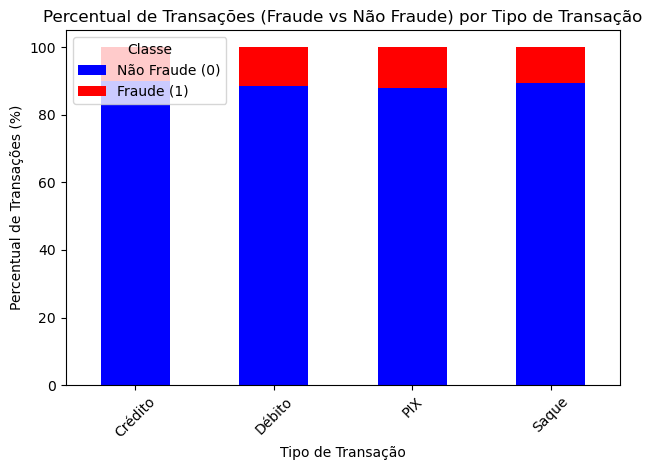

In [10]:
# Calcular os percentuais de fraudes (Classe 1) e não fraudes (Classe 0) por tipo de transação
fraude_vs_nao_fraude_percentual = df.groupby('Tipo de Transacao')['Classe'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotando o gráfico de barras empilhadas com percentuais
plt.figure(figsize=(12, 7))
# Altere a cor para Nao Fraude azul e fraude vermelho

fraude_vs_nao_fraude_percentual.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Percentual de Transações (Fraude vs Não Fraude) por Tipo de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Percentual de Transações (%)')
plt.xticks(rotation=45)
plt.legend(title='Classe', labels=['Não Fraude (0)', 'Fraude (1)'], loc='upper left')
plt.tight_layout()
plt.show()

### Verifica Tipo de Transação apenas para os casos de Fraude

C:\Users\guilh\AppData\Local\Temp\ipykernel_23208\3683733977.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraudes_por_tipo.index, y=fraudes_por_tipo.values, palette='Reds')


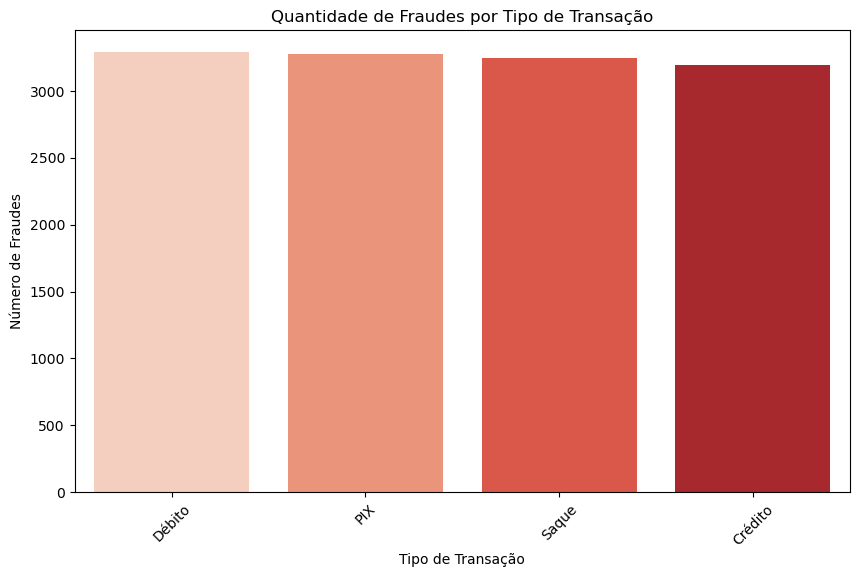

In [11]:
# Vamos exibir apenas os casos de fraude para verificar se existe alguma tendencia dentro dessa categoria
# Contagem de fraudes por tipo de transação
fraudes_por_tipo = df['Tipo de Transacao'].value_counts()

# Gráfico de barras para visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=fraudes_por_tipo.index, y=fraudes_por_tipo.values, palette='Reds')
plt.title('Quantidade de Fraudes por Tipo de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.show()

### Análise da varíavel Valor da Transacao

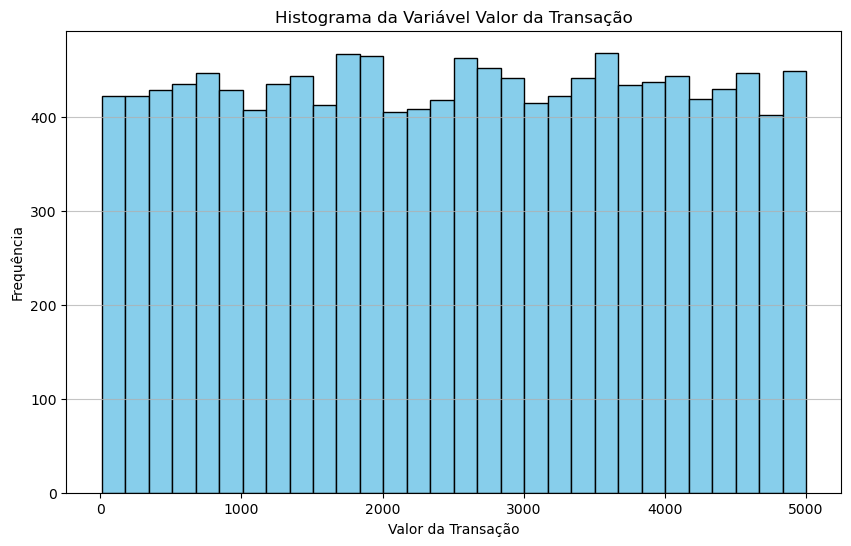

In [12]:
# Histograma da variável Valor da Transação
plt.figure(figsize=(10, 6))
plt.hist(df['Valor da Transacao'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da Variável Valor da Transação')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [13]:
# Vamos extrair apenas a hora da coluna 'Horario da Transacao'
df['Horario'] = pd.to_datetime(df['Horario da Transacao']).dt.hour
df.drop(columns=['Horario da Transacao'], inplace=True)
df.head(5)

,Tipo de Transacao,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Classe,Horario
0,Saque,390.39,5446.75,5056.36,0,7
1,Saque,3272.03,12167.89,8895.86,0,17
2,PIX,4905.72,8217.63,3311.91,0,17
3,PIX,3073.23,7833.16,4759.93,0,17
4,PIX,4233.03,6920.82,2687.79,0,17


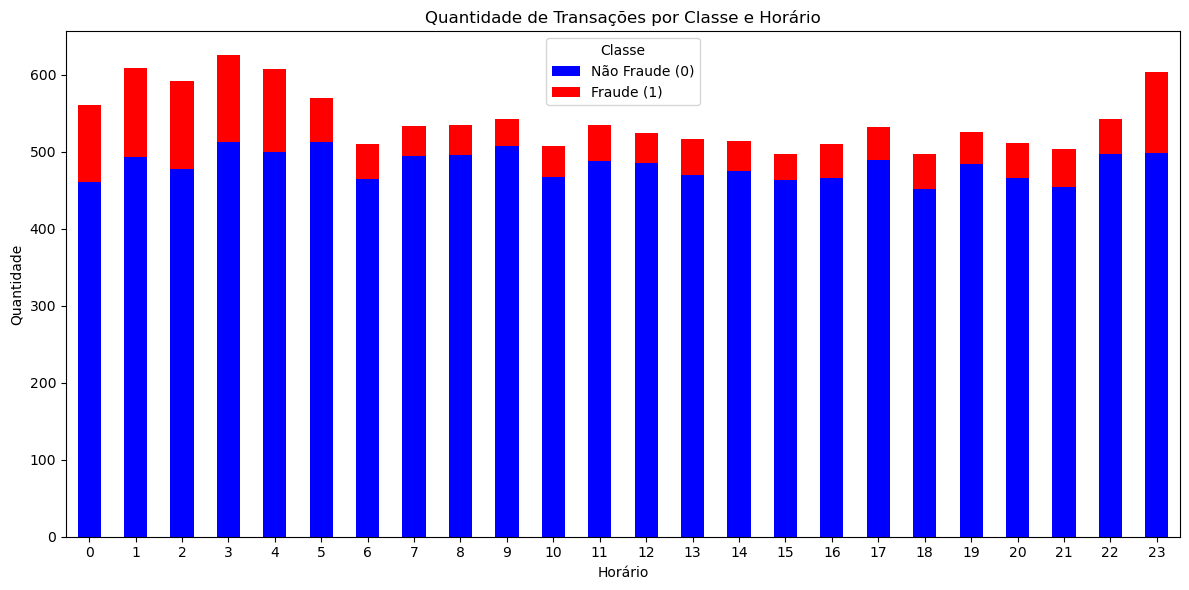

In [14]:
# Calcular a quantidade de transações por horário e classe
quantidade_por_hora = df.groupby(['Horario', 'Classe']).size().unstack(fill_value=0)

# Criar gráfico de barras empilhadas para a quantidade de cada classe por horário
quantidade_por_hora.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])
plt.title('Quantidade de Transações por Classe e Horário')
plt.xlabel('Horário')
plt.ylabel('Quantidade')
plt.legend(title='Classe', labels=['Não Fraude (0)', 'Fraude (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

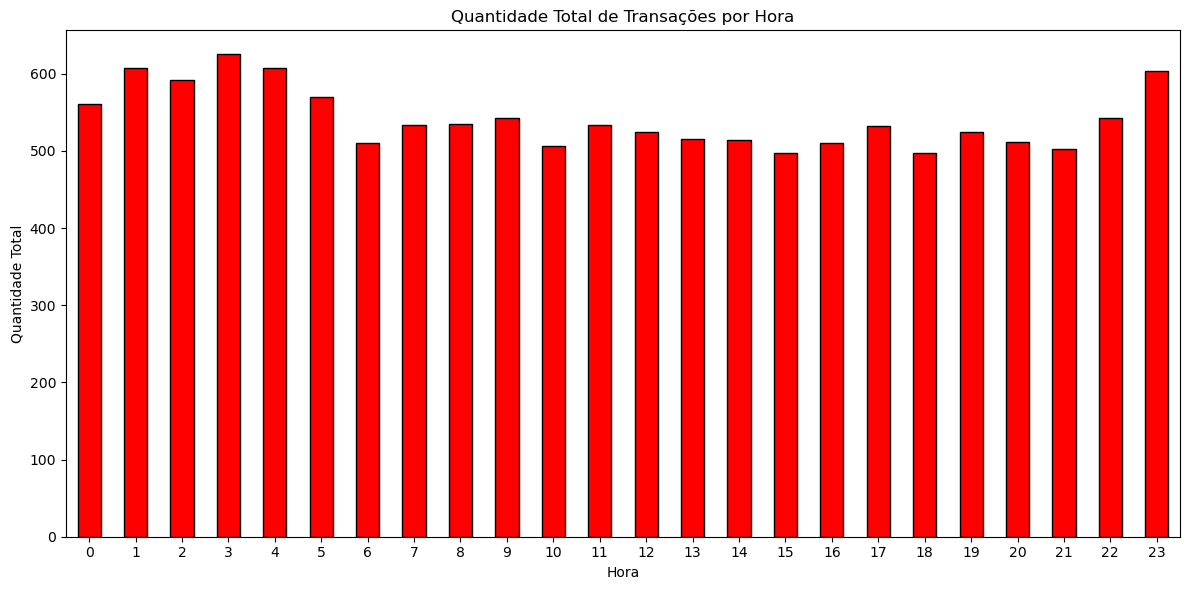

In [15]:
# Calcular a quantidade total de transações por hora
quantidade_total_por_hora = df.groupby('Horario').size()

# Criar o gráfico de barras com cor vermelha
plt.figure(figsize=(12, 6))
quantidade_total_por_hora.plot(kind='bar', color='red', edgecolor='black')
plt.title('Quantidade Total de Transações por Hora')
plt.xlabel('Hora')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Heatmap

#### Vamos aplicar o One Hot Encode no Tipo de Transação
Fazemos essa alteração para poder usar o heatmap

In [16]:
# Verificar se a coluna 'Tipo de Transacao' existe antes de realizar o One Hot Encoding
df = pd.get_dummies(df, columns=['Tipo de Transacao'], prefix='Tipo')
df.head()

,Valor da Transacao,Valor Anterior a Transacao,Valor Apos a Transacao,Classe,Horario,Tipo_Crédito,Tipo_Débito,Tipo_PIX,Tipo_Saque
0,390.39,5446.75,5056.36,0,7,False,False,False,True
1,3272.03,12167.89,8895.86,0,17,False,False,False,True
2,4905.72,8217.63,3311.91,0,17,False,False,True,False
3,3073.23,7833.16,4759.93,0,17,False,False,True,False
4,4233.03,6920.82,2687.79,0,17,False,False,True,False


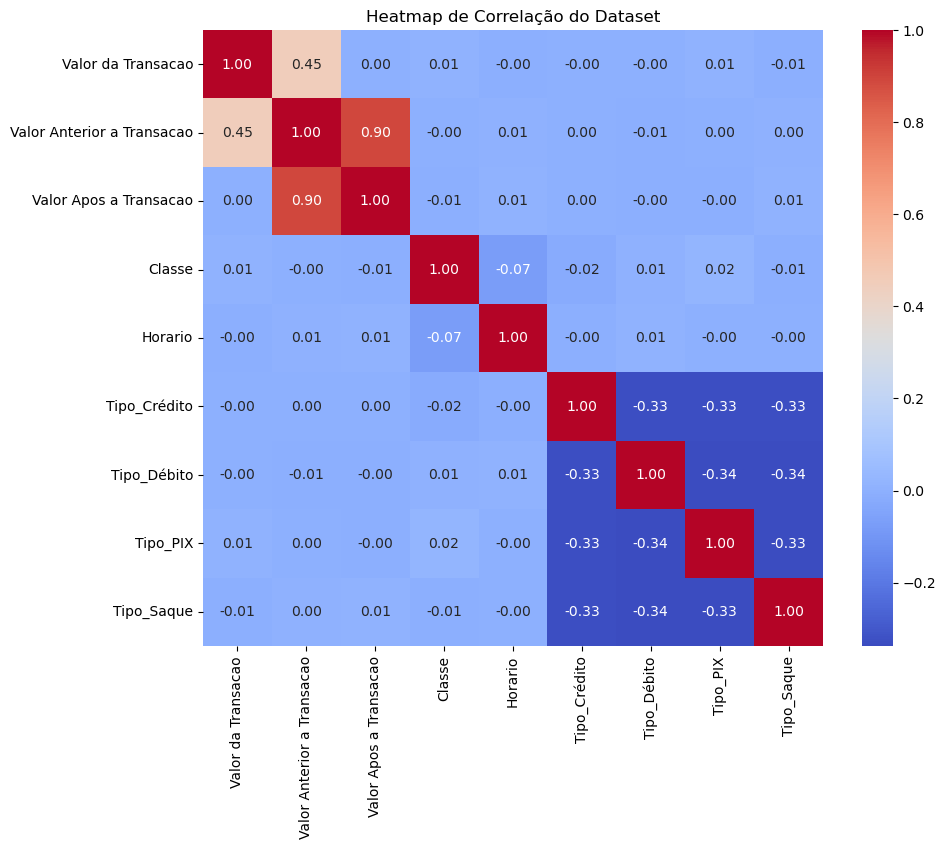

In [17]:
# Calcular a matriz de correlação
correlacao = df.corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de Correlação do Dataset")
plt.show()

#### Resultado do HeatMap

Correlação alta entre Valor Anterior à Transação e Valor Após a Transação (0.90):

Isso é esperado, pois o valor após a transação depende diretamente do valor anterior e do valor da transação. Baixa correlação entre Classe (fraude ou não) e outras variáveis:

A variável Classe não apresenta uma correlação forte com nenhuma outra variável, indicando que fraudes podem não depender linearmente de uma única variável. Correlação baixa entre Horario e outras variáveis:

O horário das transações não parece influenciar diretamente outras variáveis. Tipos de transação (Tipo_Crédito, Tipo_Débito, etc.):

Esses tipos não apresentam correlação significativa com outras variáveis, indicando que o tipo de transação pode ser independente.

### Treinamento e Avaliação do Modelo

In [18]:
# Separar as features (X) e o target (y)
X = df.drop(columns=['Classe'])
y = df['Classe']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Definir os hiperparâmetros para otimização
parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Critério de divisão (log_loss é usado para classificação probabilística)
    'max_depth': [None, 5, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 5, 10, 20],  # Mínimo de amostras em uma folha
    'max_features': [None, 'sqrt', 'log2'],  # Número máximo de features consideradas para divisão
    'splitter': ['best', 'random'],  # Estratégia de divisão (melhor divisão ou divisão aleatória)
    'class_weight': [None, 'balanced']  # Ajusta o peso das classes para lidar com desbalanceamento
}

# Instanciar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Configurar o GridSearchCV para maximizar o F1-Score
grid_search = GridSearchCV(
    estimator=modelo_arvore,
    param_grid=parametros,
    scoring='f1',  # Métrica de avaliação
    cv=5,          # Validação cruzada com 5 folds
    verbose=1,
    n_jobs=-1      # Usar todos os núcleos disponíveis
)

# Realizar a busca pelos melhores parâmetros
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 6300 candidates, totalling 31500 fits
Melhores parâmetros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [20]:
# Avaliar o modelo otimizado no conjunto de teste
modelo_otimizado = grid_search.best_estimator_
y_pred = modelo_otimizado.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3467
           1       0.18      0.41      0.25       433

    accuracy                           0.72      3900
   macro avg       0.54      0.58      0.54      3900
weighted avg       0.83      0.72      0.76      3900


Matriz de Confusão:
[[2631  836]
 [ 255  178]]

Acurácia:
0.7202564102564103


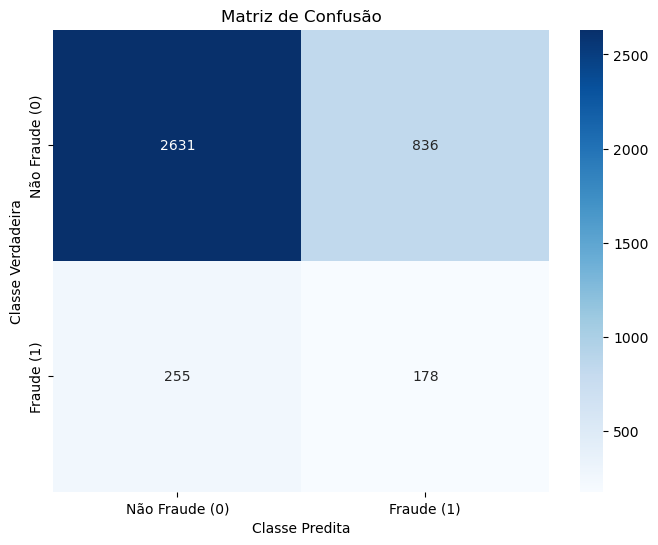

In [21]:
# Criar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude (0)', 'Fraude (1)'], yticklabels=['Não Fraude (0)', 'Fraude (1)'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

#### Avaliação dos Resultados

Com base no Relatório de Classificação e na Matriz de Confusão, os resultados do modelo foram avaliados:

---

1. Alta Precisão
- Precisão para a classe 1 (fraude): 0.18
    - Apenas 18% das transações classificadas como fraudes realmente eram fraudes.
- Precisão para a classe 0 (não fraude): 0.91
    - A maioria das transações classificadas como legítimas realmente são legítimas.

---

2. Taxa de Falsos Positivos
- Falsos Positivos (classe 0 predita como 1): 836
    - O modelo classificou 836 transações legítimas como fraudes, o que pode impactar negativamente a experiência do cliente.

---

3. Generalização
- Acurácia Geral: 0.72
    - O modelo obteve uma acurácia geral de 72%, indicando que 72% das transações foram classificadas corretamente.
- F1-Score para a classe 1 (fraude): 0.25
    - O F1-Score reflete o equilíbrio entre precisão e recall para a classe de fraudes.
- Recall para a classe 1 (fraude): 0.41
    - O modelo conseguiu identificar 41% das fraudes presentes no conjunto de teste.

---

Matriz de Confusão
- Verdadeiros Positivos (fraudes corretamente identificadas): 178
    - O modelo identificou corretamente 178 transações fraudulentas.
- Falsos Negativos (fraudes classificadas como não fraudes): 255
    - 255 transações fraudulentas não foram identificadas pelo modelo.
- Verdadeiros Negativos (não fraudes corretamente identificadas): 2631
    - O modelo classificou corretamente 2631 transações legítimas.
- Falsos Positivos (não fraudes classificadas como fraudes): 836
    - 836 transações legítimas foram classificadas incorretamente como fraudes.

---

#### Conclusão

O modelo apresentou um desempenho moderado, com boa precisão para a classe de transações legítimas (classe 0), mas com baixa precisão e recall para a classe de fraudes (classe 1). Embora tenha identificado algumas fraudes, o número de falsos positivos e falsos negativos ainda é significativo, o que pode impactar tanto a experiência do cliente quanto a eficácia na detecção de fraudes.